In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
match_days = []
for i in range(14):
    match_days.append("Day "+str(i+1))

In [3]:
outlook = ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain']

In [4]:
temperature = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

In [5]:
humidity = ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High']

In [6]:
wind = ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong']

In [7]:
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No',]

In [8]:
columns = ['Match Day', 'Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Cricket']

In [9]:
data = pd.DataFrame(data=[match_days,outlook,temperature,humidity,wind,play]).transpose()

In [10]:
data.columns=columns

In [11]:
# data.to_excel('data.xlsx')

In [12]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
dict_encoder = defaultdict(LabelEncoder)

In [13]:
data = data.apply(lambda x: dict_encoder[x.name].fit_transform(x))

In [18]:
data

,Match Day,Outlook,Temperature,Humidity,Wind,Play Cricket
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [14]:
# Match_day is not included in X because it's more like an index
X = data.iloc[:,1:-1].values
y = data['Play Cricket']

In [15]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

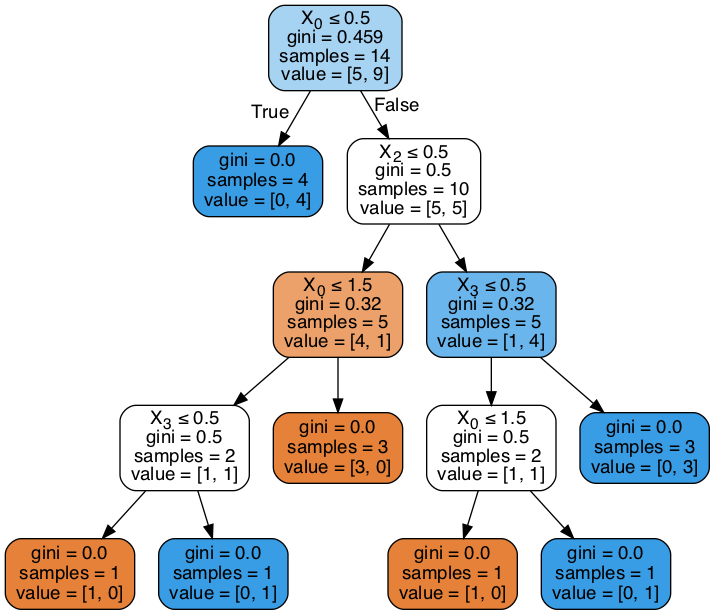

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [17]:
confusion_matrix(y, DT_clf.predict(X))

array([[5, 0],
       [0, 9]])